In [352]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy as cp
import time

import pylab as pl


class KmeansClustering:
    def __init__(self, num_clusters):
        self.k = num_clusters

    def read_data(self, filename):
        self.datapoints =  np.genfromtxt(filename, dtype=float, delimiter=',')

    @staticmethod
    def plot_initial_data(dictn, center_points):
        new_cluster = dictn
        new_center = center_points
        colors = ['m', 'r', 'g', 'b', 'c', 'k', 'y']
        i = 0
        for eachCP in new_cluster:
            lst = np.array(new_cluster[eachCP], dtype=object)
            # print(lst[:,0])
            plt.scatter(eachCP[0], eachCP[1], marker='x')
            plt.scatter(lst[:,0], lst[:,1], marker="o", c=colors[i])
            i+=1

        cx = new_center[:, 0]
        cy = new_center[:, 1]

        plt.scatter(cx, cy, color="#FF0000", marker='x', label="center points")

        plt.xlabel("set-01")
        plt.ylabel("set-02")
        plt.title("initial data")
        plt.legend()
        pl.show()


    def initial_center(self):
        self.init_center = random.sample(self.datapoints.tolist(), self.k) #numpy array to list : .tolist()
        return np.array(self.init_center)

    def initial_teams(self, centers):
        self.init_teams = {}
        init_dp = np.array(self.datapoints)
        init_cp = centers

        # finding euclidean distance
        for eachPoint in init_dp:
            subtract_res = init_cp - eachPoint
            squared_res = subtract_res**2
            summed_res = squared_res.sum(axis = 1)

            # min index of summed_res
            minIn = summed_res.argmin()
            # print(init_cp[minIn])
            tpl = tuple(init_cp[minIn])

            if tpl not in self.init_teams:
                self.init_teams[tpl] = []
            else:
                self.init_teams[tpl].append(list(eachPoint))
        return self.init_teams

    def new_clustering(self, center_points):
        init_dp = np.array(self.datapoints)
        self.centers = center_points
        self.prev_record = self.initial_teams(center_points)
        itr = 1
        shift = 0

        while True:
            i = 0
            prev_center = cp.deepcopy(self.centers)

            for key in self.prev_record:
                members = np.array(self.prev_record[key], dtype=object)
                new_center = members.mean(axis=0)
                self.centers[i] = new_center
                i+=1
                # print(new_center)
            if itr > 1 and shift < 50:
                break
            shift = 0

            #forming new teams and updating shift counts

            temp_clusters = {}

            for eachPoint in init_dp:
                subtract_res = self.centers - eachPoint
                squared_res = subtract_res**2
                summed_res = squared_res.sum(axis = 1)

                # min index of summed_res
                minIn = summed_res.argmin()
                # print(init_cp[minIn])
                tpl = tuple(self.centers[minIn])
                #populating values in each cluster group

                if tpl not in temp_clusters:
                    temp_clusters[tpl] = []
                else:
                    temp_clusters[tpl].append(list(eachPoint))

                # find prev group index


                # print key with val 100
                prev_center_key = tuple(prev_center[minIn])
                # print(key_list[position])
                index = list(self.prev_record).index(prev_center_key)

                if index != minIn:
                    shift += 1

            self.prev_record = temp_clusters
            itr += 1
        return self.prev_record

    def plot_data(self, center_points):
        new_cluster = self.new_clustering(center_points)
        new_center = self.centers
        colors = ['m', 'r', 'g', 'b', 'c', 'k', 'y']
        i = 0
        for eachCP in new_cluster:
            lst = np.array(new_cluster[eachCP], dtype=object)
            # print(lst[:,0])
            plt.scatter(eachCP[0], eachCP[1], marker='x')
            plt.scatter(lst[:,0], lst[:,1], marker="o", c=colors[i])
            i+=1

        cx = new_center[:, 0]
        cy = new_center[:, 1]

        plt.scatter(cx, cy, color="#FF0000", marker='x', label="center points")

        plt.xlabel("set-01")
        plt.ylabel("set-02")
        plt.title("final data")
        plt.legend()

    def inertia(self, center_points):
        iner = 0
        new_cluster = self.new_clustering(center_points)
        # new_center = self.centers

        for eachCP in new_cluster:
            summed_res = 0
            for eachPoint in new_cluster[eachCP]:
                subtract_res = np.asarray(eachCP) - eachPoint
                squared_res = subtract_res**2
                summed_res += squared_res.sum()
            iner += summed_res**.5
        return iner


In [353]:
kmeans2 = KmeansClustering(2)

In [354]:
kmeans2.read_data("g_data.csv")

In [355]:
init_center_points = kmeans2.initial_center()
init_team = kmeans2.initial_teams(init_center_points)

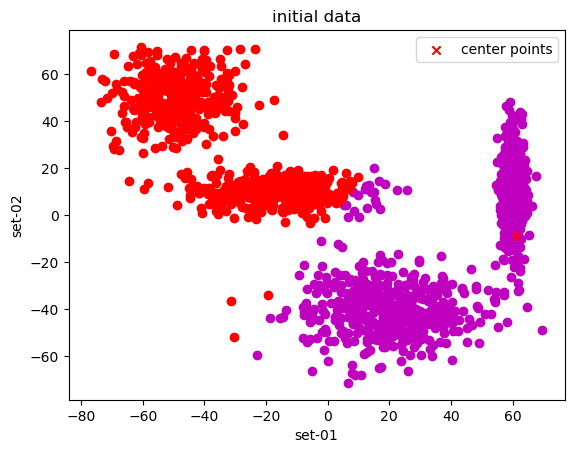

In [356]:
kmeans2.plot_initial_data(init_team, init_center_points)

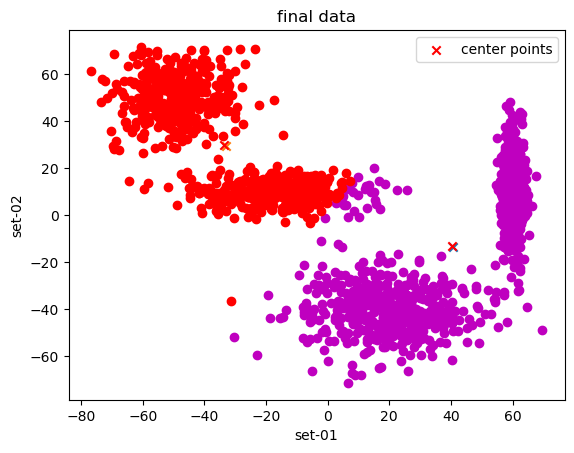

In [357]:
kmeans2.plot_data(init_center_points)

In [358]:
print("inertia of 2 : ", kmeans2.inertia(init_center_points))

inertia of 2 :  1894.7536067783913


where k = 4

In [359]:
kmeans4 = KmeansClustering(4)
kmeans4.read_data("g_data.csv")
init_center_points = kmeans4.initial_center()
init_team = kmeans4.initial_teams(init_center_points)

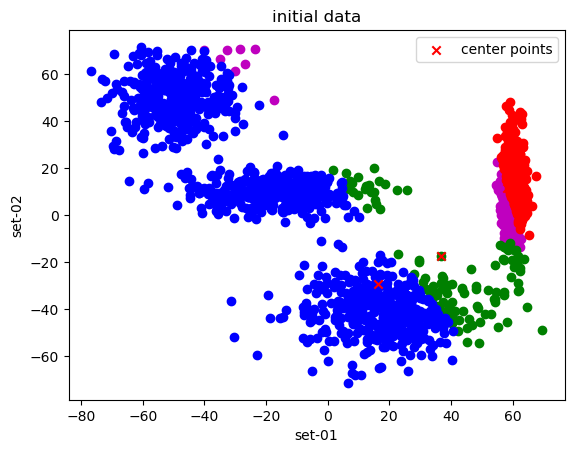

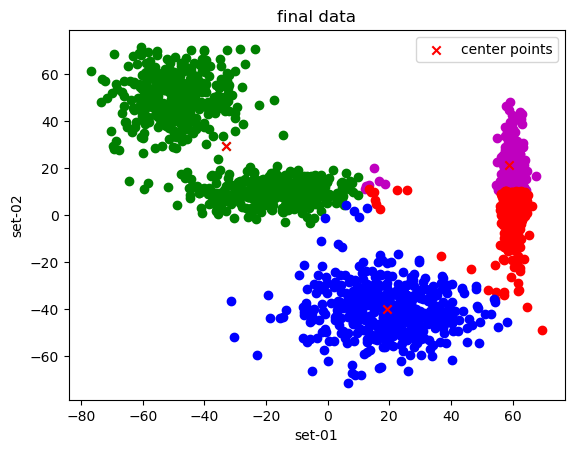

In [360]:
kmeans4.plot_initial_data(init_team,init_center_points)
kmeans4.plot_data(init_center_points)

In [361]:
print("inertia of 4 : ", kmeans4.inertia(init_center_points))

inertia of 4 :  1560.8189192812583


where k = 6

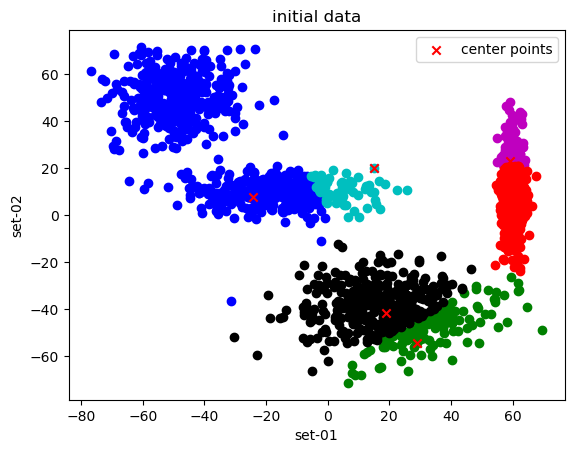

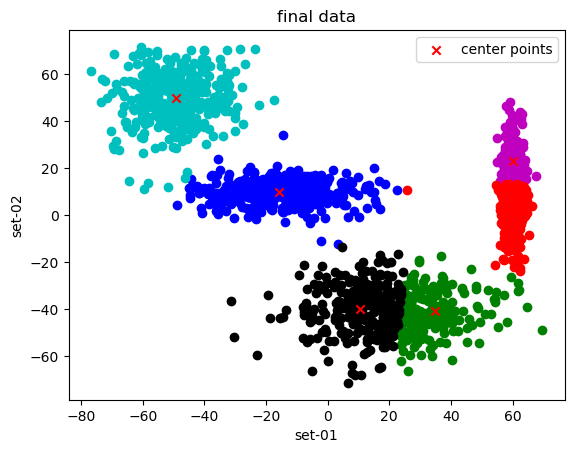

In [366]:
kmeans6 = KmeansClustering(6)
kmeans6.read_data("g_data.csv")
init_center_points = kmeans6.initial_center()
init_team = kmeans6.initial_teams(init_center_points)
kmeans6.plot_initial_data(init_team,init_center_points)
kmeans6.plot_data(init_center_points)

In [367]:
print("inertia of 6 : ", kmeans6.inertia(init_center_points))

inertia of 6 :  1253.7719591985176


where k = 7

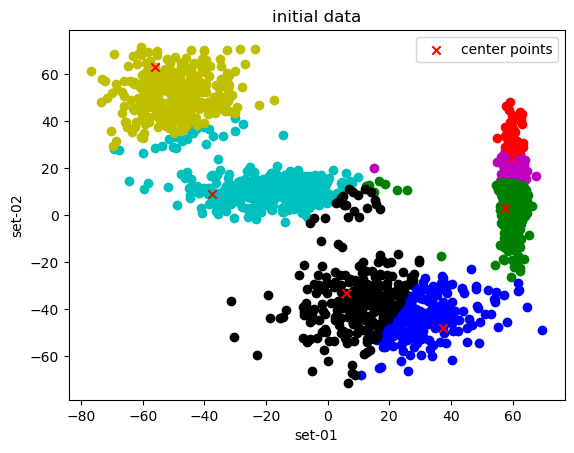

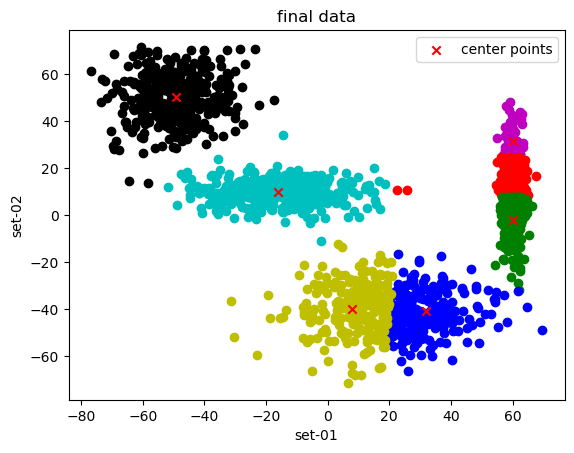

In [374]:
kmeans7 = KmeansClustering(7)
kmeans7.read_data("g_data.csv")
init_center_points = kmeans7.initial_center()
init_team = kmeans6.initial_teams(init_center_points)
kmeans7.plot_initial_data(init_team,init_center_points)
kmeans7.plot_data(init_center_points)

In [375]:
print("inertia of 7 : ", kmeans7.inertia(init_center_points))

inertia of 7 :  1243.8927330727654
